# Aprendizagem - 2nd Assignment
## Canopy Height predicition

For this assignment we were assigned the task to, given a dataset, predict the canopy height from trees.  
The canopy height is a continous value, therefore, this is not a classification problem but a regression one.

In order to make this prediction pandas as scikit-learn will be used.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [3]:
train_dataset = pd.read_csv('../datasets/train.csv')
test_dataset = pd.read_csv('../datasets/test.csv')

In [4]:
y = train_dataset['rh98']
X = train_dataset.drop(columns=['rh98'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Data Analysis

In [49]:
train_stats = train_dataset.describe()
train_stats.drop(columns=['id'])

,aspect,elevation,slope,B2_ago,B2_jul,B2_jun,B2_may,B2_sep,B3_ago,B3_jul,...,NDWI_jul,NDWI_jun,NDWI_may,NDWI_sep,PSRI_ago,PSRI_jul,PSRI_jun,PSRI_may,PSRI_sep,rh98
count,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,...,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000,29098.000000
mean,-0.012836,200.365627,6.758245,0.058219,0.063284,0.061435,0.052699,0.054484,0.084856,0.090407,...,-0.482917,-0.499658,-0.527980,-0.483092,0.123394,0.123459,0.110181,0.062967,0.123459,7.049438
std,0.710396,112.360472,5.428400,0.022375,0.022177,0.022332,0.019686,0.021926,0.028212,0.027918,...,0.090114,0.089220,0.086544,0.096009,0.075911,0.075137,0.076391,0.069724,0.075049,2.695928
min,-1.000000,4.000000,0.000000,0.015050,0.017600,0.017450,0.015200,0.010800,0.026500,0.032100,...,-0.807060,-0.798343,-0.794246,-0.792771,-0.113063,-0.096803,-0.145982,-0.118608,-0.097460,2.280000
25%,-0.782304,119.000000,2.780288,0.042250,0.047400,0.046550,0.039200,0.038763,0.064700,0.070500,...,-0.544885,-0.560014,-0.588149,-0.549860,0.072792,0.073290,0.057788,0.013658,0.072766,4.860000
50%,0.000000,175.000000,5.039364,0.055000,0.060100,0.058100,0.048900,0.051000,0.080350,0.086300,...,-0.480677,-0.498645,-0.533046,-0.480849,0.127052,0.127164,0.112578,0.060357,0.126701,7.040000
75%,0.723124,257.000000,9.290806,0.070100,0.075000,0.071900,0.061600,0.066250,0.100200,0.105600,...,-0.419831,-0.438565,-0.471949,-0.414111,0.178111,0.178028,0.165189,0.106852,0.177557,8.980000
max,1.000000,780.000000,36.833881,0.266650,0.268400,0.308050,0.278550,0.259600,0.312100,0.314550,...,-0.137326,-0.128294,0.092509,-0.117401,0.370806,0.371316,0.365913,0.365601,0.384102,15.980000


By observing the data I realized that the ranges of these values are very different, therefore, it would be a good idea to normalize them.

In [60]:
def normalize_dataset(ds: pd.DataFrame) -> pd.DataFrame:
    ids = pd.DataFrame(ds['id'])
    tmp_ds = ds.copy().drop(columns='id')
    normalized_fields = (tmp_ds-train_stats.loc['mean'] / train_stats.loc['std'])

    return ids.append(normalized_fields)

In [62]:
normalized_train_dataset = normalize_dataset(train_dataset)
normalized_test_dataset = normalize_dataset(test_dataset)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
desired_columns = []

for i in range(2, 9):
    tmp = [f'B{i}_may', f'B{i}_jun', f'B{i}_jul', f'B{i}_ago', f'B{i}_sep']
    desired_columns.extend(tmp)

test_dataset[desired_columns].head()


,B2_may,B2_jun,B2_jul,B2_ago,B2_sep,B3_may,B3_jun,B3_jul,B3_ago,B3_sep,...,B7_may,B7_jun,B7_jul,B7_ago,B7_sep,B8_may,B8_jun,B8_jul,B8_ago,B8_sep
0,0.06140,0.07690,0.08085,0.07410,0.0668,0.0877,0.10730,0.1039,0.1054,0.09420,...,0.2785,0.30065,0.2925,0.26880,0.2511,0.3125,0.32275,0.31865,0.2951,0.2750
1,0.03940,0.04890,0.04790,0.03990,0.0350,0.0681,0.07480,0.0722,0.0631,0.05900,...,0.2336,0.23600,0.2303,0.20860,0.1999,0.2467,0.25025,0.24310,0.2162,0.2113
2,0.04460,0.04725,0.04990,0.04290,0.0377,0.0687,0.06885,0.0721,0.0656,0.06210,...,0.2106,0.20790,0.2142,0.19440,0.1919,0.2397,0.22830,0.23140,0.2190,0.2135
3,0.05250,0.05630,0.05910,0.04980,0.0488,0.0784,0.08230,0.0854,0.0778,0.07380,...,0.2408,0.24175,0.2408,0.21550,0.2150,0.2624,0.26030,0.26220,0.2379,0.2335
4,0.04525,0.05430,0.05705,0.05175,0.0452,0.0762,0.08310,0.0865,0.0778,0.07475,...,0.2739,0.27715,0.2751,0.24785,0.2393,0.2934,0.29100,0.29555,0.2680,0.2560


ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (154).

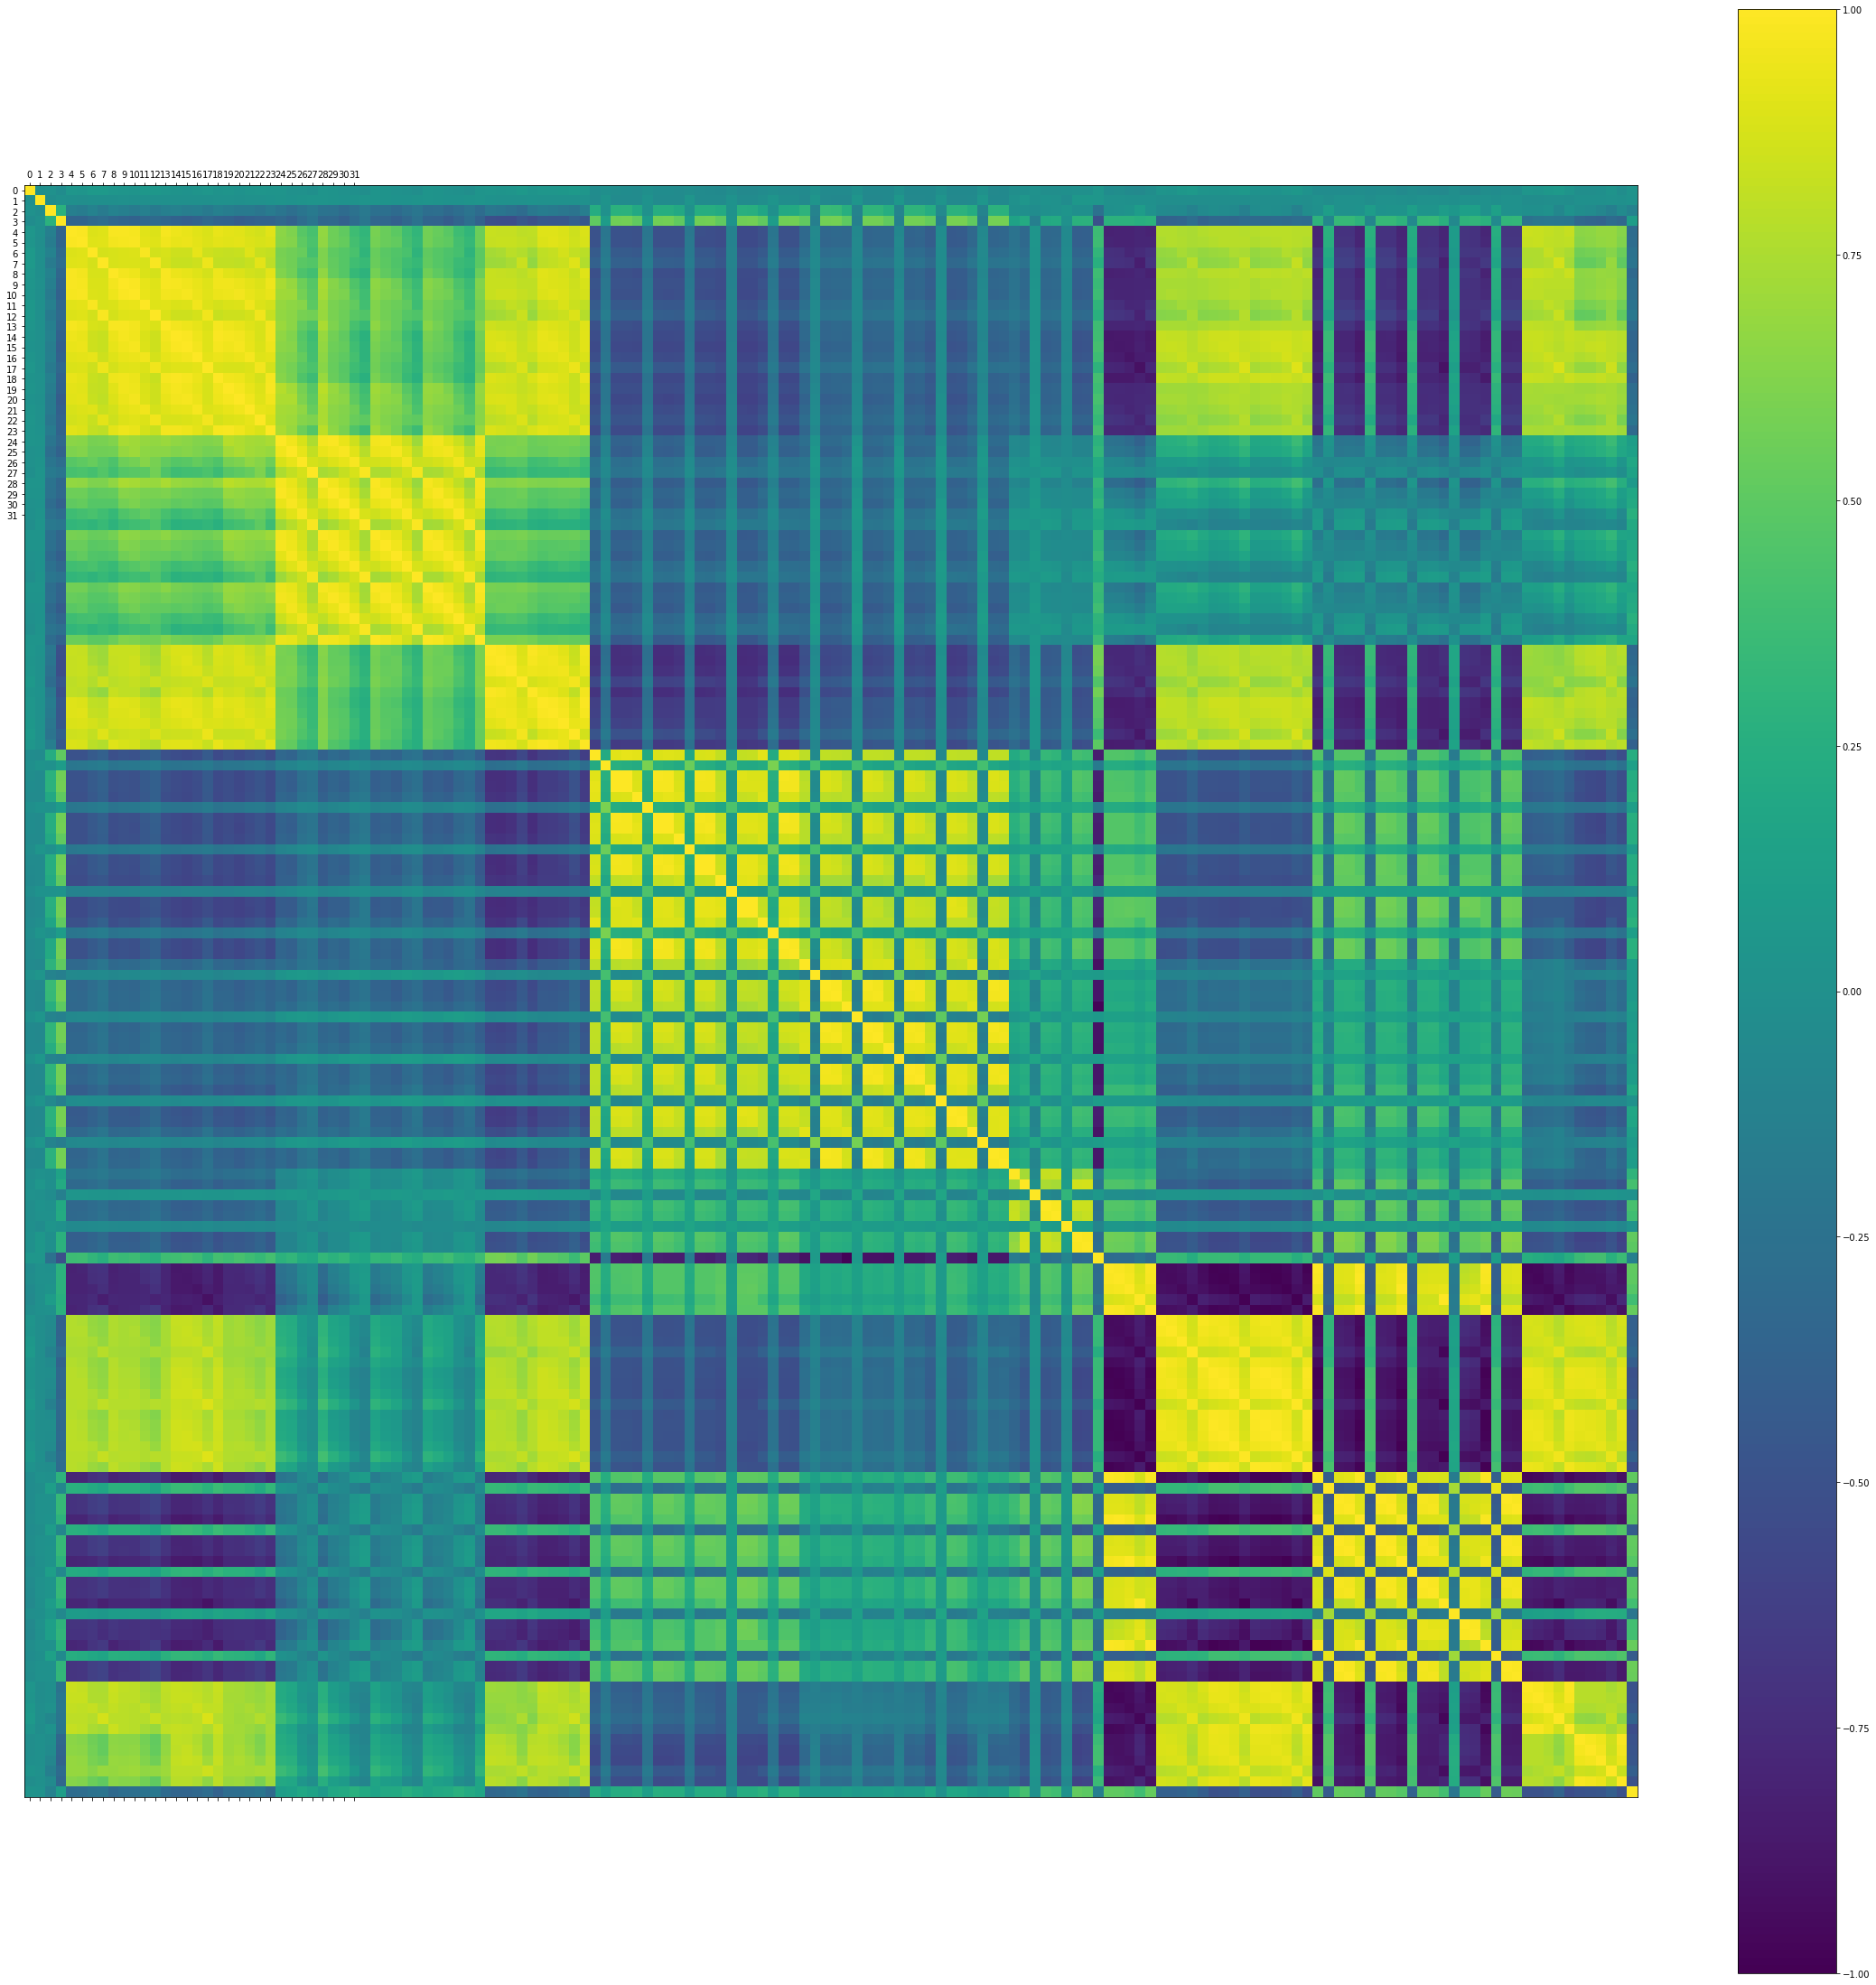

In [19]:
for i in range(2, 9):
    tmp = [f'B{i}_may', f'B{i}_jun', f'B{i}_jul', f'B{i}_ago', f'B{i}_sep']

## Strategies
After loading the data a set of alghoritms will be chosen.

## Random Forest
#### Tuned Parameters
- Number of Estimators = [100, 500, 1000]
- Max depth = [30, 50, 100]
- Max features = ['auto', 'sqrt']

Therefore, we'll be calculating 3 * 3 * 2 = 18 combinations.

In [28]:
params = {"n_estimators": [100, 500, 1000],
        "max_depth": [30, 50, 100],
        "max_features": ["auto", "sqrt"]}

clf = RandomForestRegressor(n_jobs=-1)
grid = GridSearchCV(estimator=clf, param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_params_


{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000}

The best parameters for this experiment were {'max_depth': 100, 'max_features': 'auto', 'n_estimators': 1000}.

In [38]:
prediction = grid.predict(test_dataset)
rh98_series = pd.Series(prediction)

In [39]:
submission = pd.concat([test_dataset['id'], rh98_series], axis=1)
submission.set_axis(['id', 'rh98'], axis='columns')

,id,rh98
0,1,8.91603
1,11,10.19810
2,12,7.44876
3,13,7.16645
4,17,7.99893
...,...,...
7263,36336,9.79463
7264,36354,10.31577
7265,36360,9.05185
7266,36366,5.56809


In [40]:
submission.to_csv('pred.csv', index=False)